# **1. Problem statement:**

Given dataset is about various Netflix series and movies and their various features. 
Task 1. Try to find some more features through data mining techniques and feature engineering to get better quality analysis.

Task 2, using the clustering techniques, prepare clusters from the data and by finding the unique features from those clusters, provide suggestions to Netflix on how they can give better recommendations and improve their business and App.


# **2. Importing the libraries and the dataset:**

In [2]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata
import nltk
#import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline
sns.set()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\home\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\home\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\home\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [4]:
original_df = pd.read_csv('netflix_titles.csv')
df = original_df.copy()

# **3. Understanding data:**

In [5]:
# top 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
import re

# Function to categorize items based on keywords
def categorize_item(item):
    if pd.isna(item):
        return 'Unknown'

    keywords = {
        'January': ['Jan', 'January'],
        'February': ['Feb', 'February'],
        'March': ['Mar', 'March'],
        'April': ['Apr', 'April'],
        'May': ['May'],
        'June': ['Jun', 'June'],
        'July': ['Jul', 'July'],
        'August': ['Aug', 'August'],
        'September': ['Sep', 'September'],
        'October': ['Oct', 'October'],
        'November': ['Nov', 'November'],
        'December': ['Dec', 'December'],
    }

    for category, category_keywords in keywords.items():
        for keyword in category_keywords:
            try:
                if re.search(keyword, str(item), re.IGNORECASE):
                    return category
            except TypeError:
                pass

    return 'Unknown'

# Apply categorization to each item in the 'date_added' column
df['Month'] = df['date_added'].apply(categorize_item)

# Display the updated DataFrame
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",November
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",July
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,November
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",January


In [7]:
df['Decade'] = (df['release_year'] // 10) * 10 
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month,Decade
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2020
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2020
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2020
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2020
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",November,2000
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",July,2010
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,November,2000
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",January,2000


In [8]:
# unique values in each column
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
Month             13
Decade            10
dtype: int64

## <b> 3.1. Attribute Information </b>
1. **show_id** : Unique ID for every Movie / Tv Show
2. **type** : Identifier - A Movie or TV Show
3. **title** : Title of the Movie / Tv Show
4. **director** : Director of the Movie
5. **cast** : Actors involved in the movie / show
6. **country** : Country where the movie / show was produced
7. **date_added** : Date it was added on Netflix
8. **release_year** : Actual Releaseyear of the movie / show
9. **rating** : TV Rating of the movie / show
10. **duration** : Total Duration - in minutes or number of seasons
11. **listed_in** : Genre
12. **description**: The Summary description

# **4. Cleaning data:**

## **4.1. Checking for duplicate records:**

In [9]:
# Checking for duplicate records
df.duplicated().value_counts()

False    8807
dtype: int64

**There are no duplicated records in the dataset.**

## **4.2. Checking for missing values and handling them:**

In [10]:
# Missing values in the dataset
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
Month              0
Decade             0
dtype: int64

**There are many missing values in director, cast, country, date_added, and rating columns.**

In [11]:
# Checking the unique values in each attribute of the dataset
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
Month             13
Decade            10
dtype: int64

* The missing values in the director, cast, and country attributes can be replaced with 'Unknown'
* 10 records with missing values in the date_added column can be dropped.
* The missing values in rating can be imputed with its mode, since this attribute is discrete.

In [12]:
# Handling the missing values
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0, inplace = True)

In [13]:
df.shape

(8794, 14)

We have successfully handled all the missing values in the dataset.

## **4.3. Country, listed_in:**

In [14]:
# Top countries
df.country.value_counts()

United States                             2809
India                                      972
Unknown                                    830
United Kingdom                             418
Japan                                      244
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 749, dtype: int64

In [15]:
# Genre of shows
df.listed_in.value_counts()

Dramas, International Movies                                   362
Documentaries                                                  359
Stand-Up Comedy                                                334
Comedies, Dramas, International Movies                         274
Dramas, Independent Movies, International Movies               252
                                                              ... 
Crime TV Shows, International TV Shows, TV Sci-Fi & Fantasy      1
International TV Shows, TV Horror, TV Sci-Fi & Fantasy           1
Crime TV Shows, Kids' TV                                         1
Horror Movies, International Movies, Sci-Fi & Fantasy            1
Cult Movies, Dramas, Thrillers                                   1
Name: listed_in, Length: 513, dtype: int64

* There are some movies / TV shows that were filmed in multiple countries, have multiple genres associated with it.
* To simplify the analysis, let's consider only the primary country where that respective movie / TV show was filmed.
* Also, let's consider only the primary genre of the respective movie / TV show.

In [16]:
# Choosing the primary country and primary genre to simplify the analysis
df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])

In [17]:
# contry in which a movie was produced
df.country.value_counts()

United States     3202
India             1008
Unknown            830
United Kingdom     627
Canada             271
                  ... 
Namibia              1
Senegal              1
Luxembourg           1
Syria                1
Somalia              1
Name: country, Length: 87, dtype: int64

In [18]:
# genre of shows
df.listed_in.value_counts()

Dramas                          1600
Comedies                        1210
Action & Adventure               859
Documentaries                    829
International TV Shows           773
Children & Family Movies         605
Crime TV Shows                   399
Kids' TV                         386
Stand-Up Comedy                  334
Horror Movies                    275
British TV Shows                 252
Docuseries                       220
Anime Series                     175
International Movies             128
Reality TV                       120
TV Comedies                      119
Classic Movies                    80
TV Dramas                         67
Thrillers                         65
Movies                            54
TV Action & Adventure             39
Stand-Up Comedy & Talk Shows      34
Romantic TV Shows                 32
Anime Features                    21
Independent Movies                20
Classic & Cult TV                 20
Music & Musicals                  18
T

## **4.4. Typecasting 'duration' from string to integer**

In [19]:
# Splitting the duration column, and changing the datatype to integer
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))

In [20]:
# Number of seasons for tv shows
df[df['type']=='TV Show'].duration.value_counts()

1     1793
2      421
3      198
4       94
5       64
6       33
7       23
8       17
9        9
10       6
13       2
15       2
12       2
17       1
11       1
Name: duration, dtype: int64

In [21]:
# Movie length in minutes
df[df['type']=='Movie'].duration.unique()

array([ 90,  91, 125, 104, 127,  67,  94, 161,  61, 166, 147, 103,  97,
       106, 111, 110, 105,  96, 124, 116,  98,  23, 115, 122,  99,  88,
       100, 102,  93,  95,  85,  83, 113,  13, 182,  48, 145,  87,  92,
        80, 117, 128, 119, 143, 114, 118, 108,  63, 121, 142, 154, 120,
        82, 109, 101,  86, 229,  76,  89, 156, 112, 107, 129, 135, 136,
       165, 150, 133,  70,  84, 140,  78,  64,  59, 139,  69, 148, 189,
       141, 130, 138,  81, 132, 123,  65,  68,  66,  62,  74, 131,  39,
        46,  38, 126, 155, 159, 137,  12, 273,  36,  34,  77,  60,  49,
        58,  72, 204, 212,  25,  73,  29,  47,  32,  35,  71, 149,  33,
        15,  54, 224, 162,  37,  75,  79,  55, 158, 164, 173, 181, 185,
        21,  24,  51, 151,  42,  22, 134, 177,  52,  14,  53,   8,  57,
        28,  50,   9,  26,  45, 171,  27,  44, 146,  20, 157,  17, 203,
        41,  30, 194, 233, 237, 230, 195, 253, 152, 190, 160, 208, 180,
       144,   5, 174, 170, 192, 209, 187, 172,  16, 186,  11, 19

In [22]:
# datatype of duration
df.duration.dtype

dtype('int64')

We have successfully converted the datatype of duration column to int.

## **4.5. Typecasting 'date_added' from string to datetime:**

In [23]:
# Typecasting 'date_added' from string to datetime
df["date_added"] = pd.to_datetime(df['date_added'])

In [24]:
# first and last date on which a show was added on Netflix
df.date_added.min(),df.date_added.max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-09-25 00:00:00'))

The shows were added on Netflix between 1st January 2008 and 16th January 2021.

In [25]:
# Adding new attributes month and year of date added

df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year
df.drop('date_added', axis=1, inplace=True)

## **4.6. Rating:**

The ratings can be changed to age restrictions that apply on certain movies and TV shows.

[Reference](https://www.primevideo.com/help/ref=atv_hp_nd_cnt?nodeId=GFGQU3WYEG6FSJFJ)

In [26]:
# Age ratings
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

<Axes: xlabel='rating', ylabel='count'>

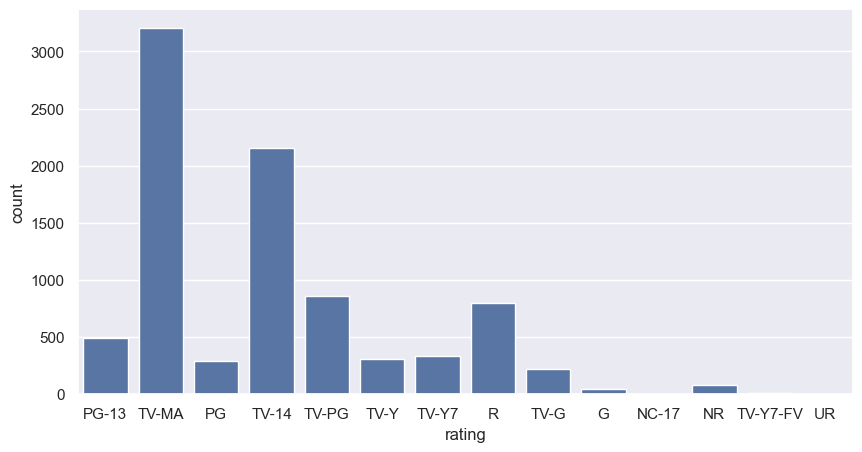

In [27]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=df)

**Around 50% of shows on Netflix are produced for adult audience. Followed by young adults, older kids and kids. Netflix has the least number of shows that are specifically produced for teenagers than other age groups.**

# **5. Exploratory Data Analysis:**

## **5.1. Univatiate Analysis:**

Text(0.5, 1.0, 'Movies and TV Shows in the dataset')

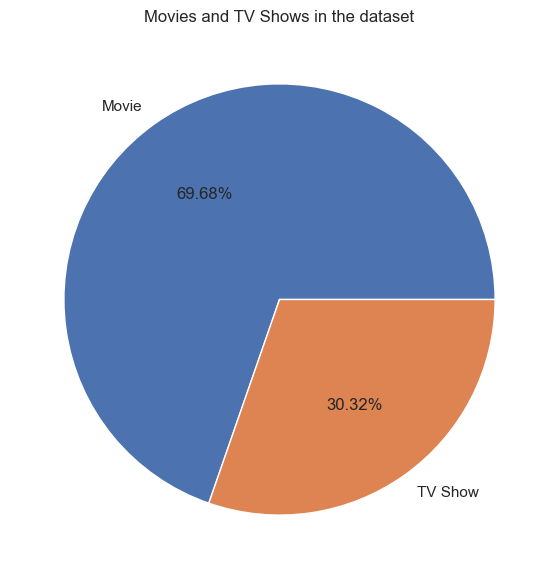

In [28]:
# Number of Movies and TV Shows in the dataset
plt.figure(figsize=(7,7))
df.type.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset')

* **There are more movies (69.14%) than TV shows (30.86%)  in the dataset.**

Text(0.5, 1.0, 'Top 10 directors by number of shows directed')

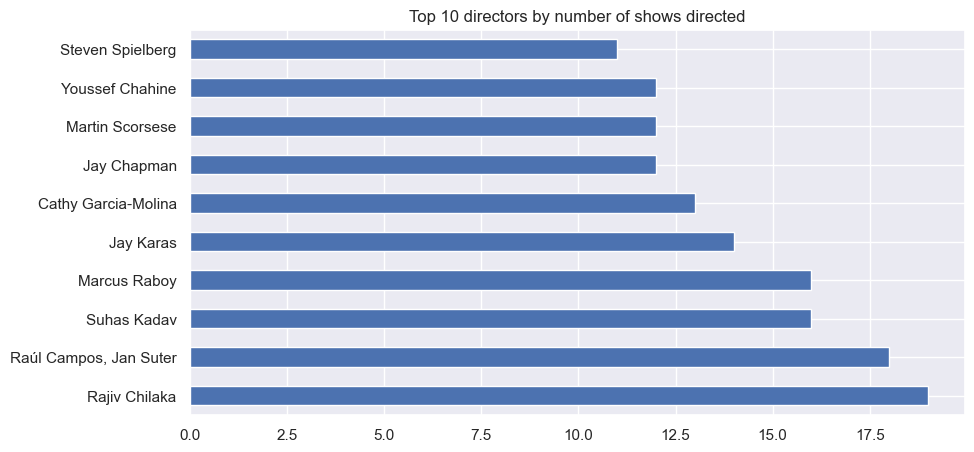

In [29]:
# Top 10 directors in the dataset
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 directors by number of shows directed')

* **Raul Campos and Jan Suter together have directed 18 movies / TV shows, higher than anyone in the dataset.**

Text(0.5, 1.0, 'Top 10 genres')

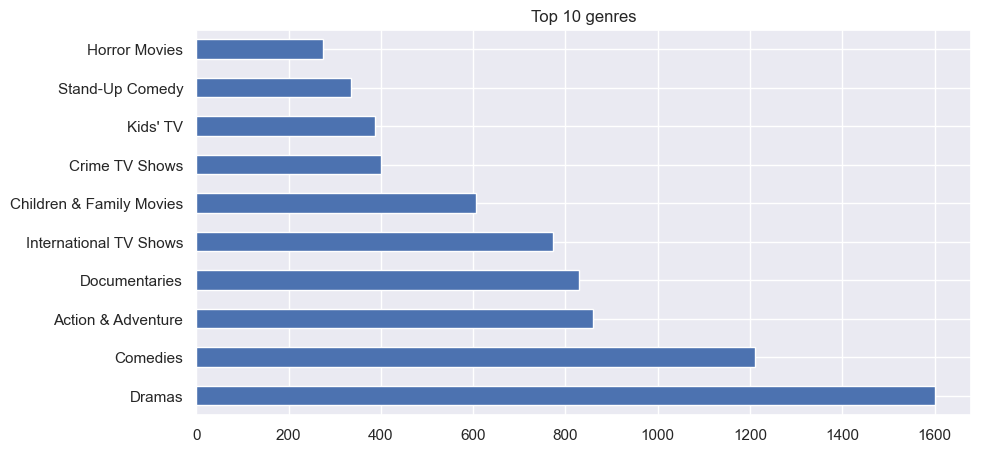

In [30]:
# Top 10 genres 
plt.figure(figsize=(10,5))
df.listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres')

In [31]:
# Share of top 3 genres
df.listed_in.value_counts().nlargest(3).sum()/len(df)*100

41.7216283829884

In [32]:
# Share of top 10 genres
df.listed_in.value_counts().nlargest(10).sum()/len(df)*100

82.67000227427792

* **The dramas is the most popular genre followed by comedies and documentaries.**
* **These three genres account for about 41% of all movies and TV shows.**
* **This value increases to about 82% for top 10 genres.**

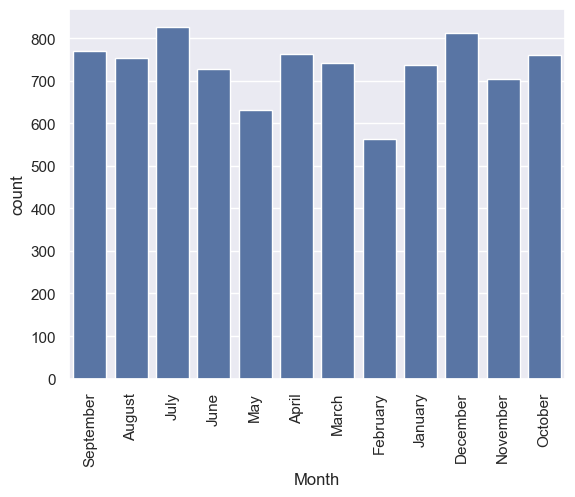

In [33]:
# Countplot to visualize the categories in the 'type' column
sns.countplot(data=df, x='Month')
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

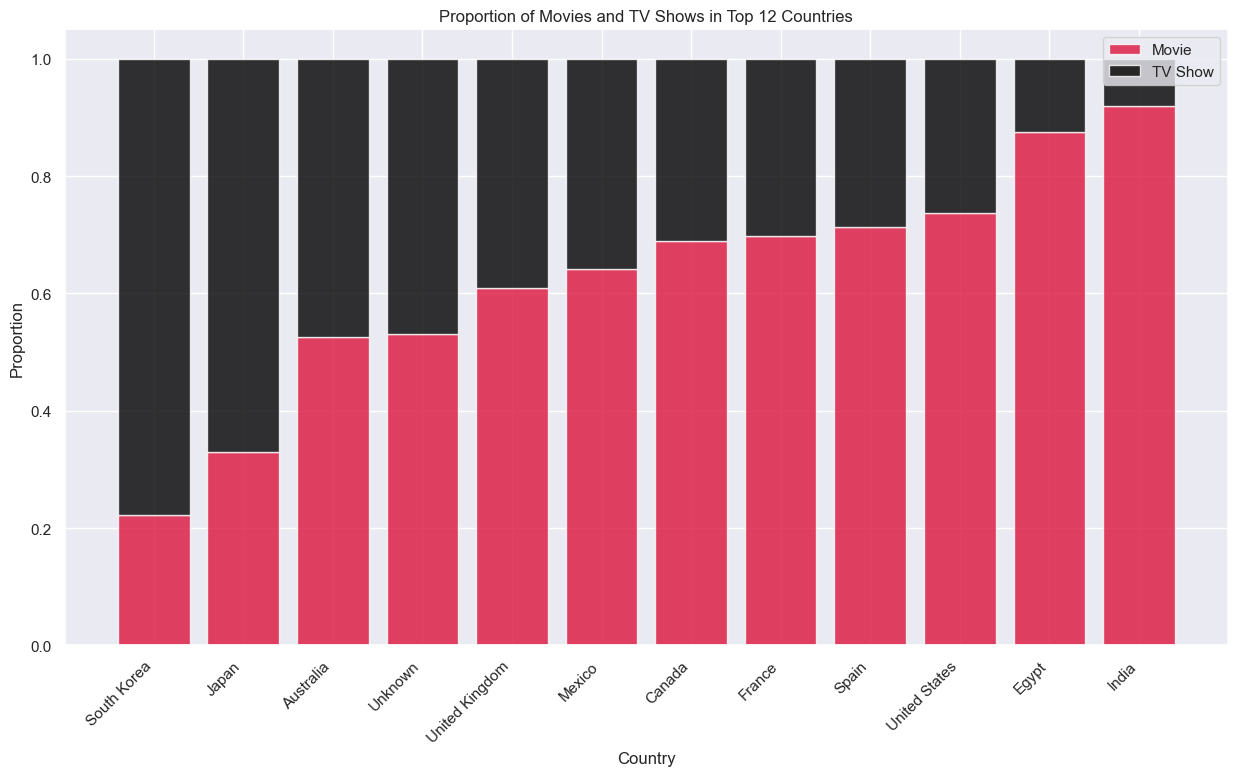

In [34]:
#Bar plot for country
country_order = df['country'].value_counts()[:12].index
content_data = df[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie', ascending=False)[::-1]

# Plotting the vertical bar plot
fig, ax = plt.subplots(figsize=(15, 8))

ax.bar(content_data_ratio.index, content_data_ratio['Movie'], color='crimson', alpha=0.8, label='Movie')
ax.bar(content_data_ratio.index, content_data_ratio['TV Show'], bottom=content_data_ratio['Movie'],
       color='black', alpha=0.8, label='TV Show')

# Adding labels and title
ax.set_xlabel('Country')
ax.set_ylabel('Proportion')
ax.set_title('Proportion of Movies and TV Shows in Top 12 Countries')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding legend
ax.legend()

# Display the plot
plt.show()


## **5.2. Bivariate analysis:**

In [35]:
content_counts_per_decade = df.groupby(['Decade', 'type']).size().unstack(fill_value=0)

<Figure size 1400x800 with 0 Axes>

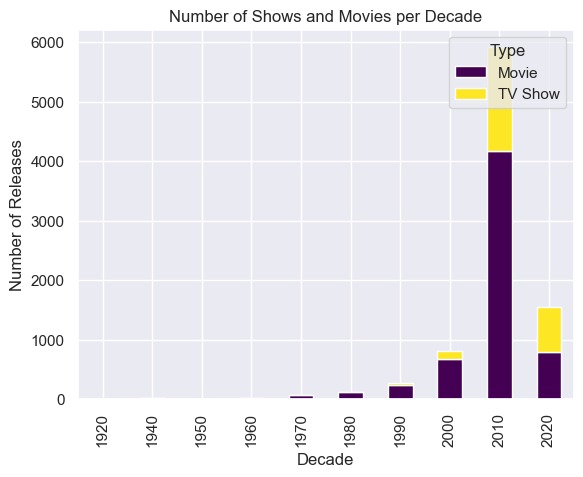

In [36]:
plt.figure(figsize=(14, 8))
content_counts_per_decade.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Number of Shows and Movies per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Releases')
plt.legend(title='Type', loc='upper right')
plt.show()

In [37]:
average_runtime_per_decade = df.groupby(['Decade', 'type'])['duration'].mean().reset_index()

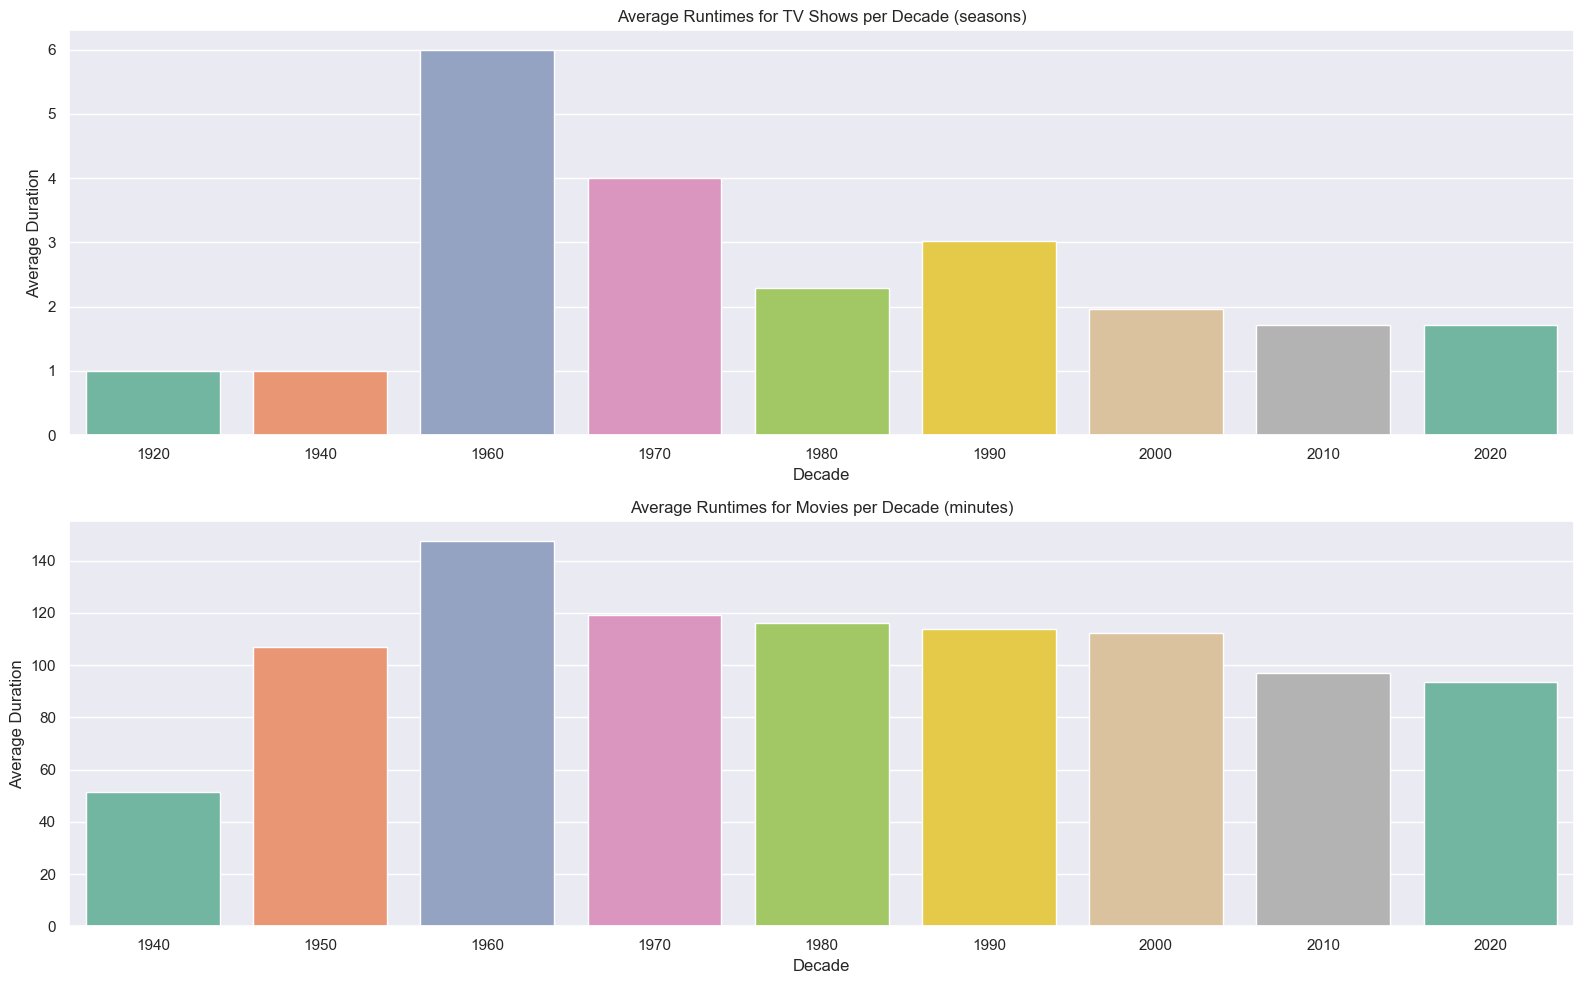

In [38]:
# Filter data for TV shows and movies
tv_shows_data = average_runtime_per_decade[average_runtime_per_decade['type'] == 'TV Show']
movies_data = average_runtime_per_decade[average_runtime_per_decade['type'] == 'Movie']

# Create separate plots for TV shows and movies
plt.figure(figsize=(16, 10))

# Plotting average runtime per decade for TV shows
plt.subplot(2, 1, 1)
sns.barplot(x='Decade', y='duration', data=tv_shows_data, palette='Set2')
plt.title('Average Runtimes for TV Shows per Decade (seasons)')
plt.xlabel('Decade')
plt.ylabel('Average Duration')

# Plotting average runtime per decade for movies
plt.subplot(2, 1, 2)
sns.barplot(x='Decade', y='duration', data=movies_data, palette='Set2')
plt.title('Average Runtimes for Movies per Decade (minutes)')
plt.xlabel('Decade')
plt.ylabel('Average Duration')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [39]:
rating_counts_per_decade = df.groupby(['Decade', 'rating']).size().unstack(fill_value=0)

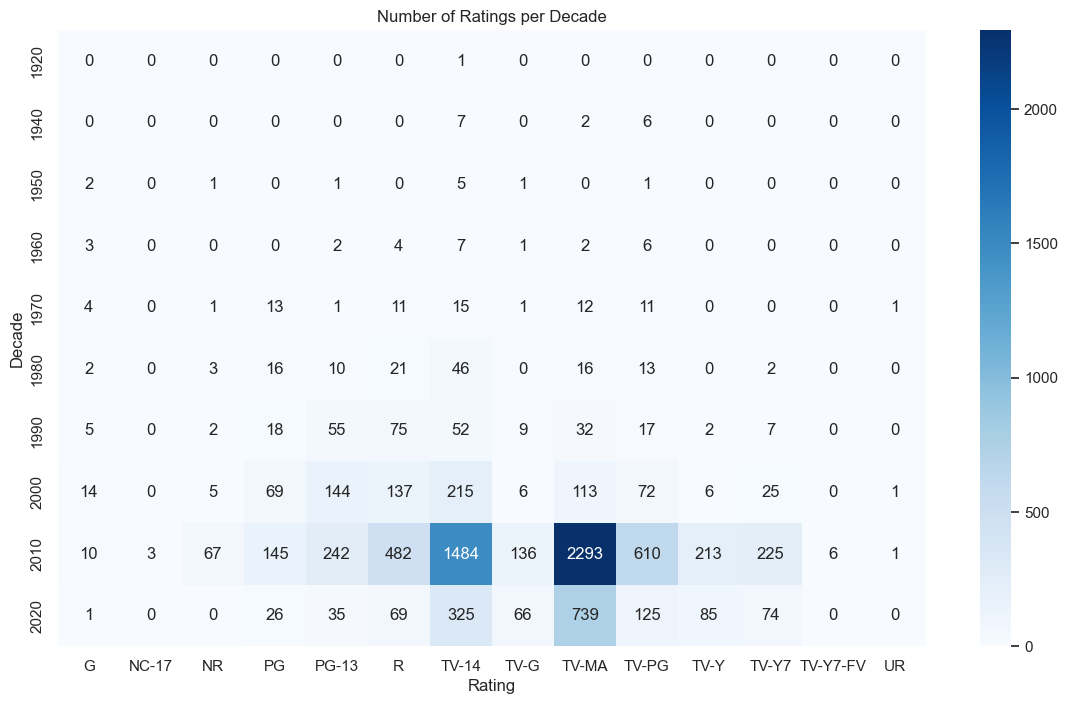

In [40]:
plt.figure(figsize=(14, 8))
sns.heatmap(rating_counts_per_decade, annot=True, cmap='Blues', fmt='g')
plt.title('Number of Ratings per Decade')
plt.xlabel('Rating')
plt.ylabel('Decade')
plt.show()

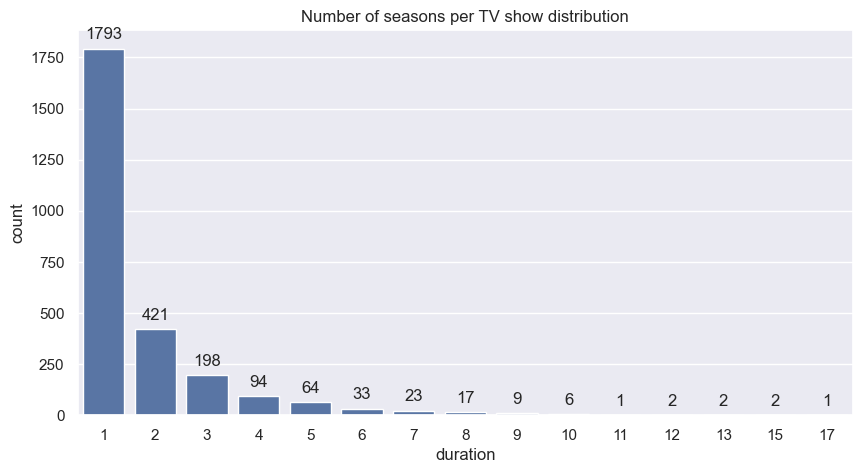

In [41]:
# Seasons in each TV show
plt.figure(figsize=(10,5))
p = sns.countplot(x='duration',data=df[df['type']=='TV Show'])
plt.title('Number of seasons per TV show distribution')

for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [42]:
# % of tv shows with just 1 season
len(df[(df['type']=='TV Show') & (df['duration']==1)]) / len(df[df['type']=='TV Show'])* 100

67.2543135783946

* **The TV series in the dataset have up to 16 seasons, however the bulk of them only have one. This might mean that the majority of TV shows has only recently begun, and that further seasons are on the way.**
* **There are very few TV shows that have more than 8 seasons.**

Text(0.5, 1.0, 'Top 10 genres for movies')

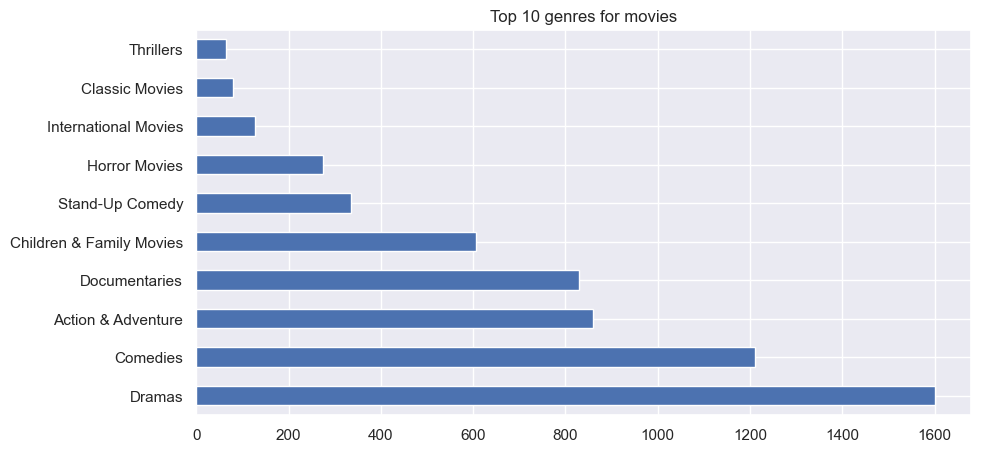

In [43]:
# Top 10 genre for movies
plt.figure(figsize=(10,5))
df[df['type']=='Movie'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres for movies')

* **Dramas, comedies, and documentaries are the most popular genre for the movies on Netflix.**

Text(0.5, 1.0, 'Actors who have appeared in highest number of movies')

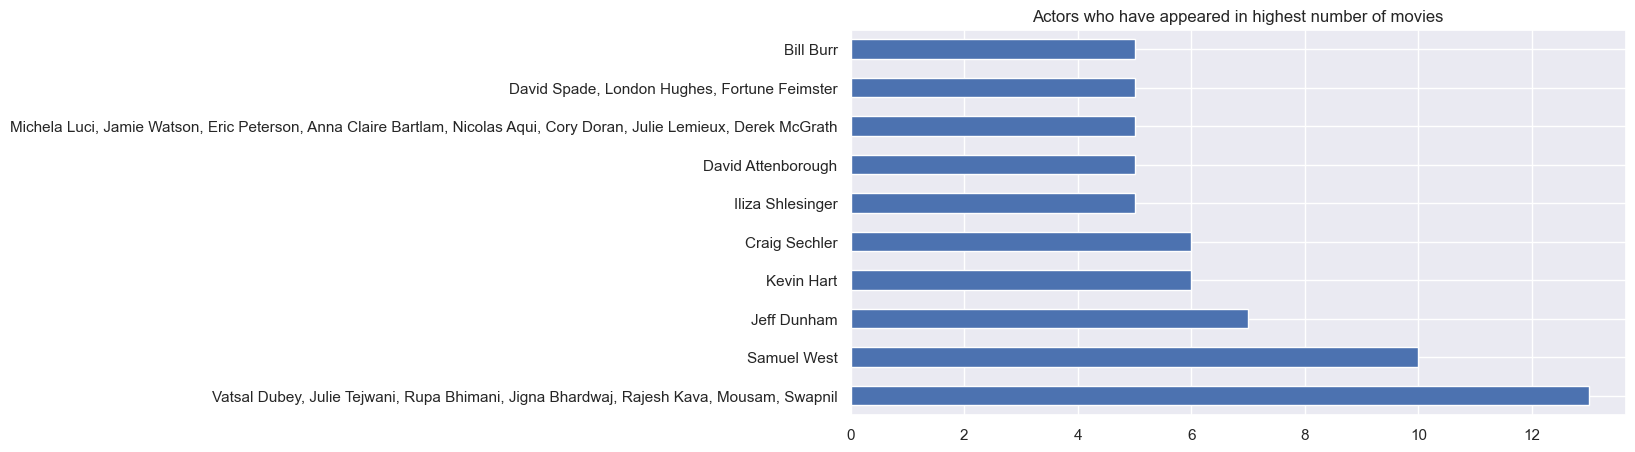

In [44]:
# Top actors for movies
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='Movie')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of movies')

* **Samuel West has appeared in 10 movies, followed by Jeff Dunham with 7 movies.**

Text(0.5, 1.0, 'Actors who have appeared in highest number of TV shows')

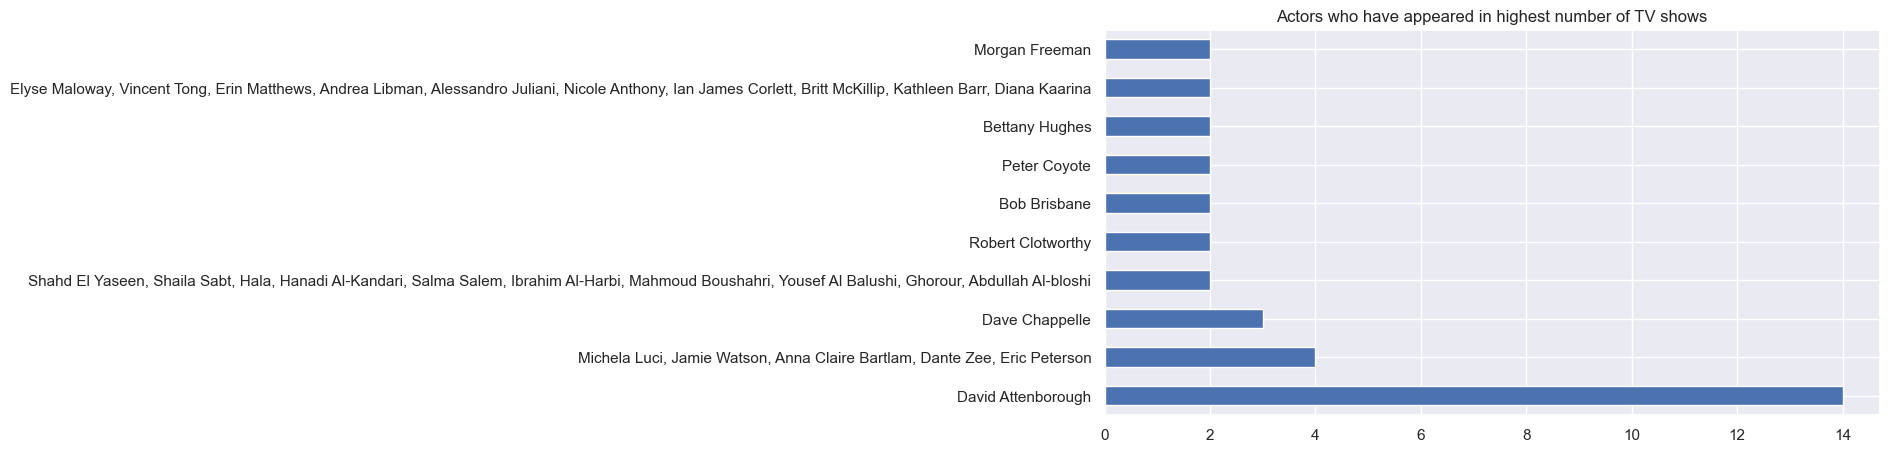

In [45]:
# Top actors for TV shows
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='TV Show')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of TV shows')

* **David Attenborough has appeared in 13 TV shows, followed by Michela Luci, Jamie Watson, Anna Claire Bartlam, Dante Zee, Eric Peterson with 4 TV shows.**

# Hypothesis Testing

TEST 1

HO:movies rated for kids and older kids are at least two hours long.
H1:movies rated for kids and older kids are not at least two hours long.

In [48]:
#making copy of df_clean_frame
df_hypothesis=df.copy()
#head of df_hypothesis
df_hypothesis.head()

#filtering movie from Type_of_show column
df_hypothesis = df_hypothesis[df_hypothesis["type"] == "Movie"]

In [49]:
#with respect to each ratings assigning it into group of categories                 
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df_hypothesis['Age_Group'] = df_hypothesis['rating'].replace(ratings_ages)
#let's see unique target ages 
df_hypothesis['Age_Group'].unique()

array(['Teens', 'Older Kids', 'Adults', 'Kids'], dtype=object)

In [50]:
df_hypothesis.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,Month,Decade,month_added,year_added,Age_Group
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",September,2020,9,2021,Teens
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,September,2020,9,2021,Older Kids
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,1993,TV-MA,125,Dramas,"On a photo shoot in Ghana, an American model s...",September,1990,9,2021,Adults
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,PG-13,104,Comedies,A woman adjusting to life after a loss contend...,September,2020,9,2021,Teens
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...",Germany,2021,TV-MA,127,Dramas,After most of her family is murdered in a terr...,September,2020,9,2021,Adults


In [51]:
# Check the data types of the 'duration' column
print(df_hypothesis['duration'].dtype)

# Convert non-string values to string
df_hypothesis['duration'] = df_hypothesis['duration'].astype(str)

# Extract the numeric part from the 'duration' column
df_hypothesis['duration'] = df_hypothesis['duration'].str.extract('(\d+)')

# Convert the 'duration' column to numeric
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])

int64


In [52]:
# Check the data type of the 'duration' column
print(df_hypothesis['duration'].dtype)

# If the 'duration' column is already float64, you can skip the conversion
# df_hypothesis['duration'] = df_hypothesis['duration'].astype(float)

# Continue with converting the 'duration' column to numeric (if needed)
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])

int64


In [53]:
#group_by duration and Age_Group                
group_by_= df_hypothesis[['duration','Age_Group']].groupby(by='Age_Group')
#mean of group_by variable
group=group_by_.mean().reset_index()
group


,Age_Group,duration
0,Adults,98.816111
1,Kids,67.255034
2,Older Kids,91.640577
3,Teens,109.789776


In [54]:
#In A and B variable grouping values 
A= group_by_.get_group('Kids')
B= group_by_.get_group('Older Kids')
#mean and std. calutation for kids and older kids variables
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))

Mean for movies rated for Kids duration    67.255034
dtype: float64 
 Mean for  movies rated for older kids duration    91.640577
dtype: float64
Std for  movies rated for Older Kids duration    30.514448
dtype: float64 
 Std for  movies rated for kids duration    33.745463
dtype: float64


In [55]:
#import stats 
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

298 971
dof 1267
SP_2 = duration    1090.086548
dtype: float64
SP duration    33.016459
dtype: float64
tvalue -11.152927506843636


In [56]:
stats.t.ppf(0.025,dof)

-1.9618380970304778

In [57]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9618380970304774

Because the t-value is not in the range, the null hypothesis is rejected.

As a result, movies rated for kids and older kids are not at least two hours long.

TEST 2

H1:The duration which is more than 90 mins are movies
HO:The duration which is more than 90 mins are NOT movies

In [59]:
#making copy of df_clean_frame
df_hypothesis=df.copy()
#head of df_hypothesis
df_hypothesis.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,Month,Decade,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",September,2020,9,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",September,2020,9,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,TV-MA,1,Crime TV Shows,To protect his family from a powerful drug lor...,September,2020,9,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021,TV-MA,1,Docuseries,"Feuds, flirtations and toilet talk go down amo...",September,2020,9,2021
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2,International TV Shows,In a city of coaching centers known to train I...,September,2020,9,2021


In [60]:
# Check the data types of the 'duration' column
print(df_hypothesis['duration'].dtype)

# Convert non-string values to string
df_hypothesis['duration'] = df_hypothesis['duration'].astype(str)

# Extract the numeric part from the 'duration' column
df_hypothesis['duration'] = df_hypothesis['duration'].str.extract('(\d+)')

# Convert the 'duration' column to numeric
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])

int64


In [61]:
# Check the data type of the 'duration' column
print(df_hypothesis['duration'].dtype)

# If the 'duration' column is already float64, you can skip the conversion
# df_hypothesis['duration'] = df_hypothesis['duration'].astype(float)

# Continue with converting the 'duration' column to numeric (if needed)
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])

int64


In [62]:
df_hypothesis['type'] = pd.Categorical(df_hypothesis['type'], categories=['Movie','TV Show'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
#df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
#df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
df_hypothesis.head(3)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,Month,Decade,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",September,2020,9,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",September,2020,9,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,TV-MA,1,Crime TV Shows,To protect his family from a powerful drug lor...,September,2020,9,2021


In [63]:
#group_by duration and TYPE                 
group_by_= df_hypothesis[['duration','type']].groupby(by='type')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

,type,duration
0,Movie,99.577187
1,TV Show,1.751313


In [64]:
#In A and B variable grouping values 
A= group_by_.get_group('Movie')
B= group_by_.get_group('TV Show')
#mean and std
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean  {}'.format(M1,M2))
print('Std  {}'.format(S2,S1))

Mean  duration    99.577187
dtype: float64
Std  duration    1.550176
dtype: float64


In [65]:
#import stats 
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

6128 2666
dof 8792
SP_2 = duration    244.276238
dtype: float64
SP duration    15.629339
dtype: float64
tvalue 269.77974833560313


In [66]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9602338426262338

In [67]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9602338426262333

Because the t-value is not in the range, the null hypothesis is rejected.

As a result, The duration which is more than 90 mins are movies

# **6. Data preprocessing:**

## **6.1. Modelling Approach:**
1. Select the attributes based on which you want to cluster the shows
2. Text preprocessing: Remove all non-ascii characters, stopwords and punctuation marks, convert all textual data to lowercase.
3. Lemmatization to generate a meaningful word out of corpus of words
4. Tokenization of corpus
5. Word vectorization
6. Dimensionality reduction
6. Use different algorithms to cluster the movies, obtain the optimal number of clusters using different techniques
7. Build optimal number of clusters and visualize the contents of each cluster using wordclouds.

We will cluster the shows on Netflix based on the following attributes:
* Director
* Cast
* Country
* Listed in (genres)
* Description

In [46]:
# Using the original dataset for clustering since
# it does not require handling missing values
df1 = original_df.copy()

In [47]:
df1.fillna('',inplace=True)

In [ ]:
# Combining all the clustering attributes into a single column

df1['clustering_attributes'] = (df1['director'] + ' ' + 
                                df1['cast'] +' ' + 
                                df1['country'] +' ' + 
                                df1['listed_in'] +' ' + 
                                df1['description'])

In [ ]:
df1['clustering_attributes'][40]

* **We have successfully added all the necessary data into a single column**

## **6.2. Removing non-ASCII characters:**

In [ ]:
# function to remove non-ascii characters

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [ ]:
# remove non-ascii characters
df1['clustering_attributes'] = remove_non_ascii(df1['clustering_attributes'])

In [ ]:
df1['clustering_attributes'][40]

* **We have successfully removed all non-ascii characters from the corpus.**

## **6.3. Remove stopwords and lower case:**

In [ ]:
# extracting the stopwords from nltk library
import nltk
from nltk.corpus import stopwords
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

In [ ]:
# function to remove stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
# Removing stop words
df1['clustering_attributes'] = df1['clustering_attributes'].apply(stopwords)

In [ ]:
df1['clustering_attributes'][40]

* **We have successfully removed all the stopwords and converted the corpus to lowercase.**

## **6.4. Remove punctuations**

In [ ]:
# function to remove punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
# Removing punctuation marks
df1['clustering_attributes'] = df1['clustering_attributes'].apply(remove_punctuation)

In [ ]:
df1['clustering_attributes'][40]

* **We have successfully dropped all the punctuation marks from the corpus.**

## **6.5. Lemmatization:**

In [ ]:
# function to lemmatize the corpus
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [ ]:
# Lemmatization
df1['clustering_attributes'] = lemmatize_verbs(df1['clustering_attributes'])

In [ ]:
df1['clustering_attributes'][40]

* **We have lemmatized the corpus.**

## **6.6. Tokenization:**

In [ ]:
tokenizer = TweetTokenizer()

In [ ]:
df1['clustering_attributes'] = df1['clustering_attributes'].apply(lambda x: tokenizer.tokenize(x))

* **The corpus is converted to tokens.**

## **6.7. Vectorization:**

In [ ]:
# clustering tokens saved in a variable
clustering_data = df1['clustering_attributes']

In [ ]:
# Tokenization
def identity_tokenizer(text):
    return text

# Using TFIDF vectorizer to vectorize the corpus 
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 20000)    
X = tfidf.fit_transform(clustering_data)

In [ ]:
X

In [ ]:
# Shape of X
X.shape

In [ ]:
# data type of vector
type(X)

In [ ]:
# convert X into array form for clustering
X = X.toarray()

## **6.8. Dimensionality reduction using PCA:**

* We can use PCA (Principal component Analysis) to reduce the dimensionality of data.

In [ ]:
# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(X)

In [ ]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

* We find that **100%** of the variance is explained by about **~7500 components**.
* Also, more than **80%** of the variance is explained just by **4000 components**.
* Hence to simplify the model, and reduce dimensionality, we can take the top 4000 components, which will still be able to capture more than 80% of variance.

In [ ]:
# reducing the dimensions to 5000 using pca
pca = PCA(n_components=5000,random_state=42)
pca.fit(X)

In [ ]:
# transformed features
x_pca = pca.transform(X)

In [ ]:
# shape of transformed vectors
x_pca.shape